In [3]:
import pandas as pd
import numpy as np
from math import pi

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

In [4]:
games_details = pd.read_csv('games_details.csv')
players = pd.read_csv('players.csv')
teams = pd.read_csv('teams.csv')
ranking = pd.read_csv('ranking.csv')
games  = pd.read_csv('games.csv')

In [5]:
def print_missing_values(df):
    df_null = pd.DataFrame(len(df) - df.notnull().sum(), columns = ['Count'])
    df_null = df_null[df_null['Count'] > 0].sort_values(by='Count', ascending=False)
    df_null = df_null/len(df)*100
    
    if len(df_null) == 0:
        display(Markdown('No missing value.'))
        return
    
    x = df_null.index.values
    height = [e[0] for e in df_null.values]
    
    fig, ax = plt.subplots(figsize=(20, 5))
    ax.bar(x, height, width=0.8)
    plt.xticks(x, x, rotation=60)
    plt.xlabel('Columns')
    plt.ylabel('Percentage')
    plt.title('Percentage of missing values in columns')
    plt.show()
    
def dataset_overview(df, df_name):
    display(Markdown(f'### {df_name} dataset overview'))
    display(Markdown(f'dataset shape : {df.shape}'))
    display(Markdown(f'#### Display 5 first rows'))
    display(df.head())
    display(Markdown('*****'))
    display(Markdown(f'#### Describe dataset'))
    display(df.describe().T)
    display(Markdown('*****'))
    display(Markdown(f'#### Missing values'))
    print_missing_values(df)

### games_details dataset overview

dataset shape : (668628, 29)

#### Display 5 first rows

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22200477,1610612759,SAS,San Antonio,1629641,Romeo Langford,Romeo,F,NaN,18:06,...,1.0,1.0,2.0,0.0,1.0,0.0,2.0,5.0,2.0,-2.0
1,22200477,1610612759,SAS,San Antonio,1631110,Jeremy Sochan,Jeremy,F,NaN,31:01,...,6.0,3.0,9.0,6.0,1.0,0.0,2.0,1.0,23.0,-14.0
2,22200477,1610612759,SAS,San Antonio,1627751,Jakob Poeltl,Jakob,C,NaN,21:42,...,1.0,3.0,4.0,1.0,1.0,0.0,2.0,4.0,13.0,-4.0
3,22200477,1610612759,SAS,San Antonio,1630170,Devin Vassell,Devin,G,NaN,30:20,...,0.0,9.0,9.0,5.0,3.0,0.0,2.0,1.0,10.0,-18.0
4,22200477,1610612759,SAS,San Antonio,1630200,Tre Jones,Tre,G,NaN,27:44,...,0.0,2.0,2.0,3.0,0.0,0.0,2.0,2.0,19.0,0.0


*****

#### Describe dataset

,count,mean,std,min,25%,50%,75%,max
GAME_ID,668628.0,2.171771e+07,5.656289e+06,1.030000e+07,2.070003e+07,2.120096e+07,2.180014e+07,5.210021e+07
TEAM_ID,668628.0,1.610613e+09,8.652260e+00,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09
PLAYER_ID,668628.0,4.013434e+05,7.225618e+06,1.500000e+01,2.466000e+03,2.011810e+05,2.034710e+05,1.962938e+09
FGM,558938.0,3.588446e+00,3.030466e+00,0.000000e+00,1.000000e+00,3.000000e+00,5.000000e+00,2.800000e+01
FGA,558938.0,7.896652e+00,5.677002e+00,0.000000e+00,3.000000e+00,7.000000e+00,1.100000e+01,5.000000e+01
FG_PCT,558938.0,4.168419e-01,2.519134e-01,0.000000e+00,2.670000e-01,4.290000e-01,5.710000e-01,1.000000e+00
FG3M,558938.0,7.781167e-01,1.227615e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.400000e+01
FG3A,558938.0,2.186019e+00,2.569913e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+00,2.400000e+01
FG3_PCT,558938.0,2.010322e-01,2.896851e-01,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e-01,1.000000e+00
FTM,558938.0,1.733217e+00,2.353981e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,2.600000e+01


*****

#### Missing values

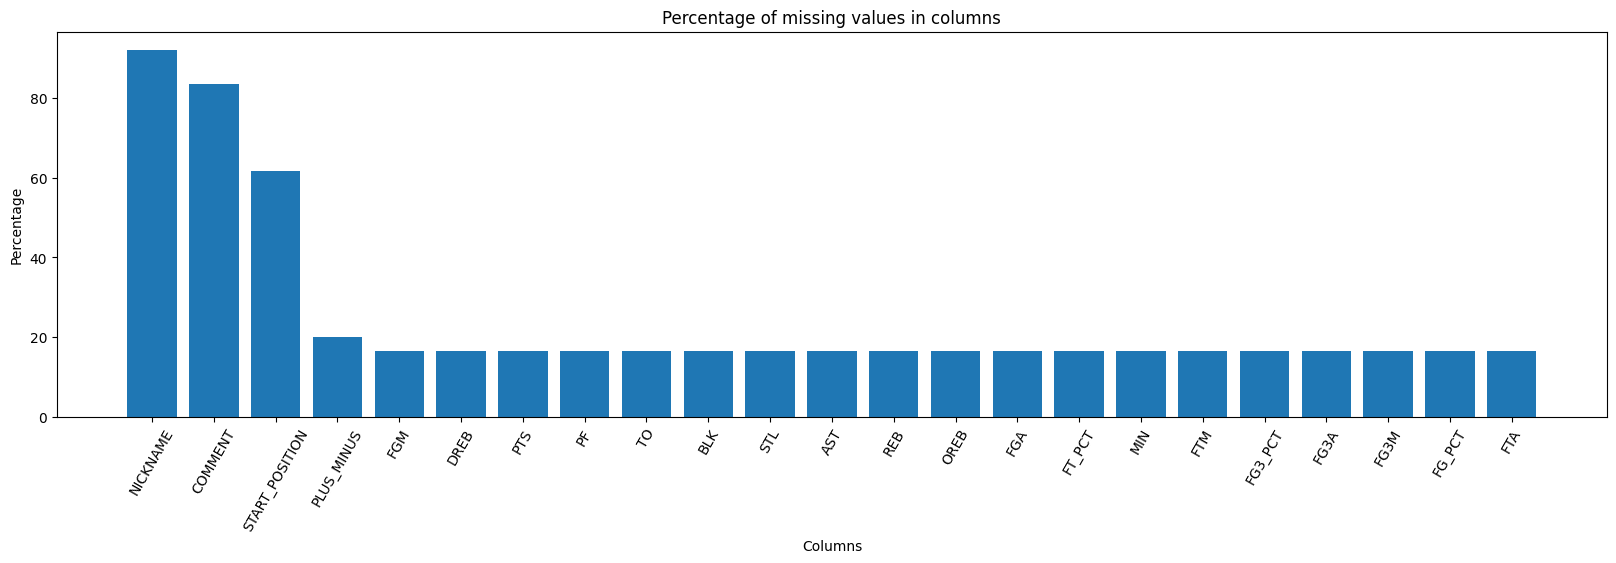

In [6]:
dataset_overview(games_details, 'games_details')

In [7]:
dataset_overview(players, 'players')

### players dataset overview

dataset shape : (7228, 4)

#### Display 5 first rows

,PLAYER_NAME,TEAM_ID,PLAYER_ID,SEASON
0,Royce O'Neale,1610612762,1626220,2019
1,Bojan Bogdanovic,1610612762,202711,2019
2,Rudy Gobert,1610612762,203497,2019
3,Donovan Mitchell,1610612762,1628378,2019
4,Mike Conley,1610612762,201144,2019


*****

#### Describe dataset

,count,mean,std,min,25%,50%,75%,max
TEAM_ID,7228.0,1.610613e+09,8.723521e+00,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09
PLAYER_ID,7228.0,2.355862e+06,6.106688e+07,2.440000e+02,2.007680e+05,2.023465e+05,2.039100e+05,1.962938e+09
SEASON,7228.0,2.014160e+03,3.126216e+00,2.009000e+03,2.012000e+03,2.014000e+03,2.017000e+03,2.019000e+03


*****

#### Missing values

No missing value.

### teams dataset overview

dataset shape : (30, 14)

#### Display 5 first rows

,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION
0,0,1610612737,1949,2019,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.0,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks
1,0,1610612738,1946,2019,BOS,Celtics,1946,Boston,TD Garden,18624.0,Wyc Grousbeck,Danny Ainge,Brad Stevens,Maine Red Claws
2,0,1610612740,2002,2019,NOP,Pelicans,2002,New Orleans,Smoothie King Center,NaN,Tom Benson,Trajan Langdon,Alvin Gentry,No Affiliate
3,0,1610612741,1966,2019,CHI,Bulls,1966,Chicago,United Center,21711.0,Jerry Reinsdorf,Gar Forman,Jim Boylen,Windy City Bulls
4,0,1610612742,1980,2019,DAL,Mavericks,1980,Dallas,American Airlines Center,19200.0,Mark Cuban,Donnie Nelson,Rick Carlisle,Texas Legends


*****

#### Describe dataset

,count,mean,std,min,25%,50%,75%,max
LEAGUE_ID,30.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
TEAM_ID,30.0,1.610613e+09,8.803408,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09
MIN_YEAR,30.0,1.969700e+03,16.698441,1.946000e+03,1.952000e+03,1.970000e+03,1.979000e+03,2.002000e+03
MAX_YEAR,30.0,2.019000e+03,0.000000,2.019000e+03,2.019000e+03,2.019000e+03,2.019000e+03,2.019000e+03
YEARFOUNDED,30.0,1.969700e+03,16.698441,1.946000e+03,1.952000e+03,1.970000e+03,1.979000e+03,2.002000e+03
ARENACAPACITY,26.0,1.855331e+04,3916.923362,0.000000e+00,1.864150e+04,1.913100e+04,1.979075e+04,2.171100e+04


*****

#### Missing values

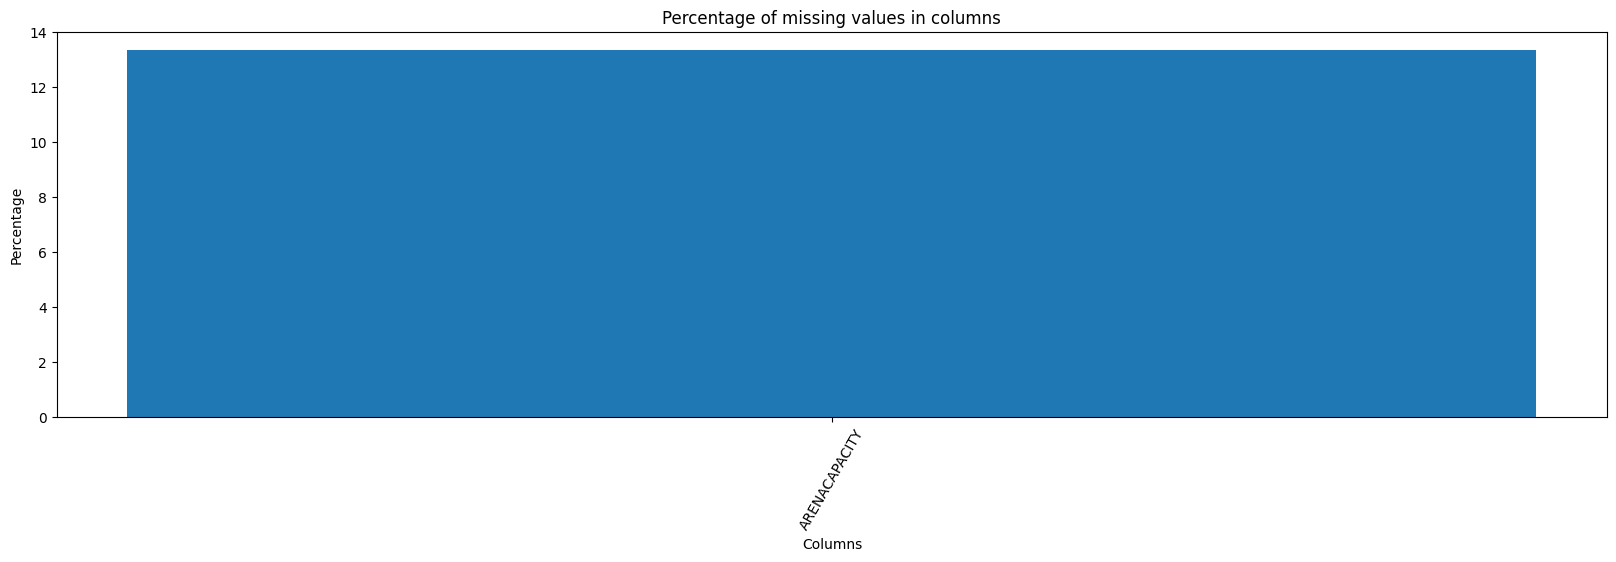

In [8]:
dataset_overview(teams, 'teams')

### ranking dataset overview

dataset shape : (210342, 13)

#### Display 5 first rows

,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
0,1610612743,0,22022,2022-12-22,West,Denver,30,19,11,0.633,10-3,9-8,NaN
1,1610612763,0,22022,2022-12-22,West,Memphis,30,19,11,0.633,13-2,6-9,NaN
2,1610612740,0,22022,2022-12-22,West,New Orleans,31,19,12,0.613,13-4,6-8,NaN
3,1610612756,0,22022,2022-12-22,West,Phoenix,32,19,13,0.594,14-4,5-9,NaN
4,1610612746,0,22022,2022-12-22,West,LA Clippers,33,19,14,0.576,11-7,8-7,NaN


*****

#### Describe dataset

,count,mean,std,min,25%,50%,75%,max
TEAM_ID,210342.0,1.610613e+09,8.641501,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09
LEAGUE_ID,210342.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
SEASON_ID,210342.0,2.140105e+04,2395.250417,1.200300e+04,2.200600e+04,2.201100e+04,2.201700e+04,2.202200e+04
G,210342.0,5.665974e+01,28.644294,0.000000e+00,3.200000e+01,6.700000e+01,8.200000e+01,8.200000e+01
W,210342.0,2.833336e+01,17.268500,0.000000e+00,1.400000e+01,2.800000e+01,4.200000e+01,7.300000e+01
L,210342.0,2.832638e+01,17.260557,0.000000e+00,1.400000e+01,2.900000e+01,4.100000e+01,7.200000e+01
W_PCT,210342.0,4.928325e-01,0.187763,0.000000e+00,3.720000e-01,5.000000e-01,6.210000e-01,1.000000e+00
RETURNTOPLAY,3990.0,6.000000e-01,0.489959,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


*****

#### Missing values

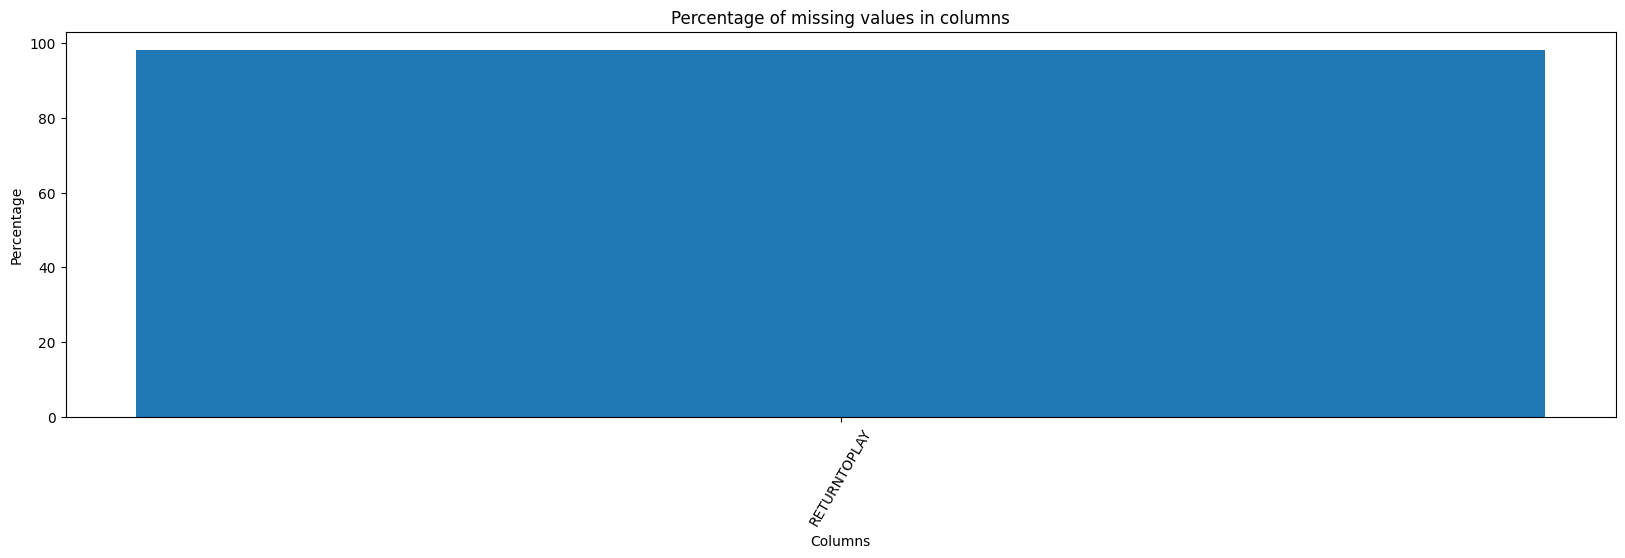

In [9]:
dataset_overview(ranking, 'ranking')

### games dataset overview

dataset shape : (26651, 21)

#### Display 5 first rows

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-12-22,22200477,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,...,25.0,46.0,1610612759,117.0,0.478,0.815,0.321,23.0,44.0,1
1,2022-12-22,22200478,Final,1610612762,1610612764,2022,1610612762,120.0,0.488,0.952,...,16.0,40.0,1610612764,112.0,0.561,0.765,0.333,20.0,37.0,1
2,2022-12-21,22200466,Final,1610612739,1610612749,2022,1610612739,114.0,0.482,0.786,...,22.0,37.0,1610612749,106.0,0.470,0.682,0.433,20.0,46.0,1
3,2022-12-21,22200467,Final,1610612755,1610612765,2022,1610612755,113.0,0.441,0.909,...,27.0,49.0,1610612765,93.0,0.392,0.735,0.261,15.0,46.0,1
4,2022-12-21,22200468,Final,1610612737,1610612741,2022,1610612737,108.0,0.429,1.000,...,22.0,47.0,1610612741,110.0,0.500,0.773,0.292,20.0,47.0,0


*****

#### Describe dataset

,count,mean,std,min,25%,50%,75%,max
GAME_ID,26651.0,2.175487e+07,5.570189e+06,1.030000e+07,2.070001e+07,2.120076e+07,2.180005e+07,5.210021e+07
HOME_TEAM_ID,26651.0,1.610613e+09,8.638670e+00,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09
VISITOR_TEAM_ID,26651.0,1.610613e+09,8.659299e+00,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09
SEASON,26651.0,2.012114e+03,5.587031e+00,2.003000e+03,2.007000e+03,2.012000e+03,2.017000e+03,2.022000e+03
TEAM_ID_home,26651.0,1.610613e+09,8.638670e+00,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09
PTS_home,26552.0,1.034559e+02,1.328337e+01,3.600000e+01,9.400000e+01,1.030000e+02,1.120000e+02,1.680000e+02
FG_PCT_home,26552.0,4.607351e-01,5.667610e-02,2.500000e-01,4.220000e-01,4.600000e-01,5.000000e-01,6.840000e-01
FT_PCT_home,26552.0,7.603771e-01,1.006767e-01,1.430000e-01,6.970000e-01,7.650000e-01,8.330000e-01,1.000000e+00
FG3_PCT_home,26552.0,3.560232e-01,1.111636e-01,0.000000e+00,2.860000e-01,3.570000e-01,4.290000e-01,1.000000e+00
AST_home,26552.0,2.282344e+01,5.193308e+00,6.000000e+00,1.900000e+01,2.300000e+01,2.600000e+01,5.000000e+01


*****

#### Missing values

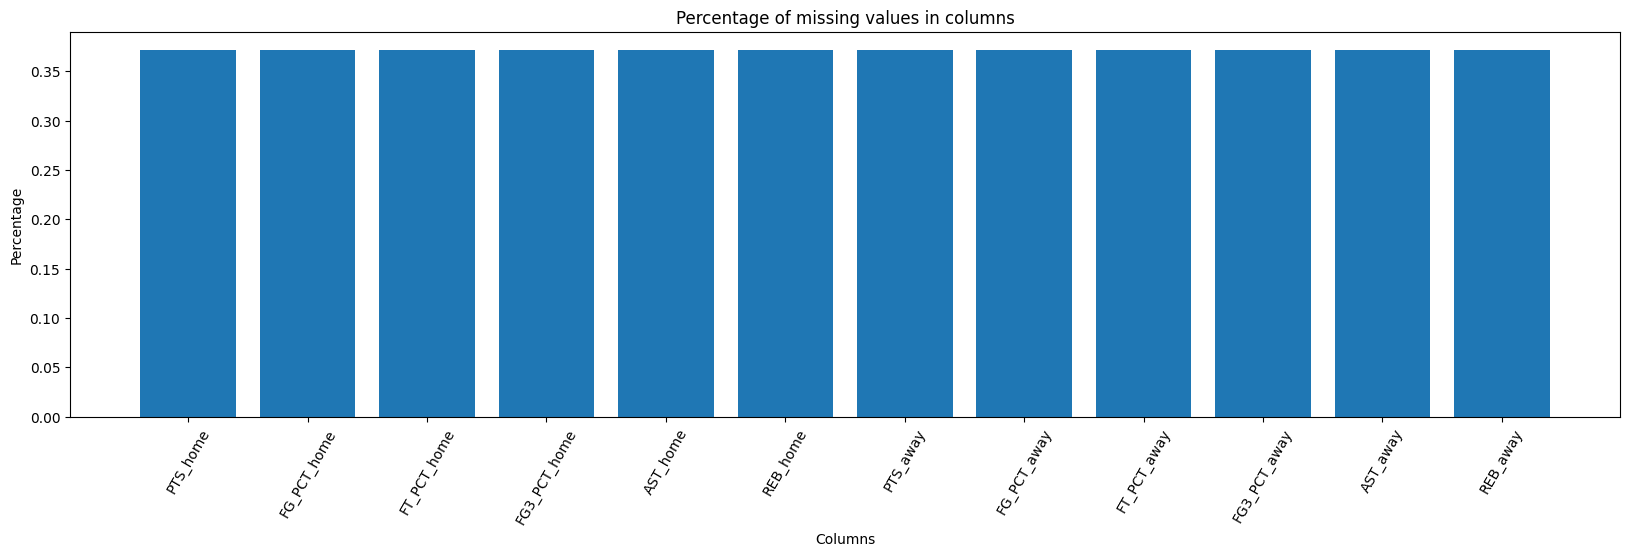

In [10]:
dataset_overview(games, 'games')

In [2]:
 print(len(a))

284


In [3]:
# Alabama - AL
# Alabama A&M - AL
# Alabama Huntsville - AL
# Alabama-Birmingham - AL
# American University - DC
# Arizona - AZ
# Arizona State - AZ
# Arkansas - AR
# Arkansas-Little Rock - AR
# Auburn - AL
# Augsburg - MN
# Augusta State - GA
# Austin Peay - TN
# Ball State - IN
# Barton Community College - KS
# Baylor - TX
# Belmont - TN
# Blinn - TX
# Boise State - ID
# Boston College - MA
# Boston U. - MA
# Bowling Green - OH
# Bradley - IL
# Brigham Young - UT
# Brigham Young-Hawaii - HI
# Bucknell - PA
# Butler - IN
# Butler Community College - KS
# Cal Poly - CA
# Cal State-Fullerton - CA
# Cal State-Long Beach - CA
# Cal State-San Bernardino - CA
# Cal-Santa Barbara - CA
# California - CA
# California State-Long Beach - CA
# California-Berkeley - CA
# California-Los Angeles - CA
# California-Santa Barbara - CA
# Campbell University - NC
# Central Arkansas - AR
# Central Connecticut State - CT
# Central Florida - FL
# Central Michigan - MI
# Central Oklahoma - OK
# Cincinnati - OH
# Clemson - SC
# Cleveland State - OH
# Colgate - NY
# College of Charleston - SC
# Colorado - CO
# Colorado State - CO
# Connecticut - CT
# Cornell - NY
# Creighton - NE
# Davidson - NC
# Dayton - OH
# DePaul - IL
# Delaware - DE
# Delta State - MS
# Detroit Mercy - MI
# Drexel - PA
# Duke - NC
# Duquesne - PA
# Eastern Michigan - MI
# Eastern Washington - WA
# Fairfield - CT
# Fayetteville State - NC
# Florida - FL
# Florida A&M - FL
# Florida Gulf Coast - FL
# Florida International - FL
# Florida State - FL
# Fordham - NY
# Fresno State - CA
# George Washington - DC
# Georgetown - DC
# Georgia - GA
# Georgia Institute of Technology - GA
# Georgia Southern - GA
# Georgia State - GA
# Georgia Tech - GA
# Gonzaga - WA
# Hampton - VA
# Hartford - CT
# Harvard - MA
# Hawaii - HI
# Hofstra - NY
# Holy Cross - MA
# Houston - TX
# Idaho - ID
# Illinois - IL
# Illinois State - IL
# Indiana - IN
# Indiana Purdue-Indianapolis - IN
# Indiana-Purdue Fort Wayne - IN
# Indiana-Purdue Indianapolis - IN
# Iona - NY
# Iowa - IA
# Iowa State - IA
# Jackson State - MS
# Jacksonville State - AL
# Kansas - KS
# Kansas State - KS
# Kent State - OH
# Kentucky - KY
# La Salle - PA
# Lamar - TX
# Le Moyne - NY
# Lehigh - PA
# Lipscomb - TN
# Long Beach State - CA
# Louisana-Lafayette - LA
# Louisiana State - LA
# Louisiana Tech - LA
# Louisiana-Lafayette - LA
# Louisville - KY
# Loyola (IL) - IL
# Manhattan - NY
# Marquette - WI
# Marshall - WV
# Maryland - MD
# Massachusetts - MA
# McNeese State - LA
# Memphis - TN
# Meridian Community College - MS
# Miami - OH
# Miami (FL) - FL
# Miami (Fla.) - FL
# Miami (OH) - OH
# Michigan - MI
# Michigan State - MI
# Midland - NE
# Midwestern State - TX
# Minnesota - MN
# Mississippi - MS
# Mississippi State - MS
# Missouri - MO
# Missouri State - MO
# Molloy - NY
# Montana - MT
# Montana State - MT
# Morehead State - KY
# Murray State - KY
# Nebraska - NE
# Nebraska-Lincoln - NE
# Nevada - NV
# Nevada-Las Vegas - NV
# Nevada-Reno - NV
# New Mexico - NM
# New Mexico State - NM
# New Orleans - LA
# No College - N/A
# Norfolk State - VA
# North Carolina - NC
# North Carolina State - NC
# North Carolina-Charlotte - NC
# North Carolina-Wilmington - NC
# North Dakota - ND
# North Texas - TX
# Northeast Mississippi Community College - MS
# Northeastern - MA
# Northern Illinois - IL
# Northwest Florida State - FL
# Northwestern - IL
# Northwestern State - LA
# Notre Dame - IN
# Oakland - MI
# Ohio - OH
# Ohio State - OH
# Ohio U. - OH
# Oklahoma - OK
# Oklahoma State - OK
# Old Dominion - VA
# Oral Roberts - OK
# Oregon - OR
# Oregon State - OR
# Pacific - CA
# Penn State - PA
# Pepperdine - CA
# Pittsburgh - PA
# Portland - OR
# Portland State - OR
# Princeton - NJ
# Providence - RI
# Purdue - IN
# Radford - VA
# Rhode Island - RI
# Rice - TX
# Richmond - VA
# Rider - NJ
# Robert Morris (IL) - IL
# Rutgers - NJ
# S.E. Missouri - MO
# Saint Joseph's - PA
# Saint Louis - MO
# Saint Mary's (CA) - CA
# Saint Vincent - PA
# San Diego State - CA
# Santa Clara - CA
# Seton Hall - NJ
# Shaw - NC
# Siena - NY
# South Carolina - SC
# South Carolina Upstate - SC
# South Dakota State - SD
# South Florida - FL
# Southeastern Illinois - IL
# Southern - LA
# Southern California - CA
# Southern Illinois - IL
# Southern Methodist - TX
# Southern Mississippi - MS
# St. Bonaventure - NY
# St. John's - NY
# St. John's (NY) - NY
# St. John's, N.Y. - NY
# St. Joseph's (PA) - PA
# St. Louis - MO
# St. Mary's (CA) - CA
# St.Mary's College of California - CA
# Stanford - CA
# Stony Brook, N.Y. - NY
# Syracuse - NY
# TCU - TX
# Temple - PA
# Tennessee - TN
# Tennessee State - TN
# Tennessee Tech - TN
# Tennessee-Martin - TN
# Texas - TX
# Texas A&M - TX
# Texas Christian - TX
# Texas State - TX
# Texas Tech - TX
# Texas-Arlington - TX
# Texas-Austin - TX
# Texas-El Paso - TX
# Texas-San Antonio - TX
# Towson - MD
# Truman State - MO
# Tulane - LA
# Tulsa - OK
# UCLA - CA
# UNLV - NV
# USC - CA
# University of California, Berkeley - CA
# University of Colorado Boulder - CO
# University of Dayton - OH
# University of Texas at Austin - TX
# Utah - UT
# Utah State - UT
# Utah Valley - UT
# Va Commonwealth - VA
# Valparaiso - IN
# Vanderbilt - TN
# Vermont - VT
# Villanova - PA
# Virginia - VA
# Virginia Commonwealth - VA
# Virginia Military Institute - VA
# Virginia Tech - VA
# Virginia Union - VA
# Wake Forest - NC
# Walsh - OH
# Washington - WA
# Washington State - WA
# Weber State - UT
# West Florida - FL
# West Virginia - WV
# Westchester CC NY - NY
# Western Carolina - NC
# Western Kentucky - KY
# Western Michigan - MI
# Wichita State - KS
# William & Mary - VA (Virginia)
# William Paterson - NJ (New Jersey)
# Wingate - NC (North Carolina)
# Wisconsin - WI (Wisconsin)
# Wisconsin-Green Bay - WI (Wisconsin)
# Wright State - OH (Ohio)
# Wyoming - WY (Wyoming)
# Xavier - OH (Ohio)
# Yale - CT (Connecticut)
# Yonsei (KOR) - Outside

SyntaxError: invalid syntax (3520194387.py, line 2)

In [13]:
colleges = {
    "Alabama": "AL",
    "Alabama A&M": "AL",
    "Alabama Huntsville": "AL",
    "Alabama-Birmingham": "AL",
    "American University": "DC",
    "Arizona": "AZ",
    "Arizona State": "AZ",
    "Arkansas": "AR",
    "Arkansas-Little Rock": "AR",
    "Auburn": "AL",
    "Augsburg": "MN",
    "Augusta State": "GA",
    "Austin Peay": "TN",
    "Ball State": "IN",
    "Barton Community College": "KS",
    "Baylor": "TX",
    "Belmont": "TN",
    "Blinn": "TX",
    "Boise State": "ID",
    "Boston College": "MA",
    "Boston U.": "MA",
    "Bowling Green": "OH",
    "Bradley": "IL",
    "Brigham Young": "UT",
    "Brigham Young-Hawaii": "HI",
    "Bucknell": "PA",
    "Butler": "IN",
    "Butler Community College": "KS",
    "Cal Poly": "CA",
    "Cal State-Fullerton": "CA",
    "Cal State-Long Beach": "CA",
    "Cal State-San Bernardino": "CA",
    "Cal-Santa Barbara": "CA",
    "California": "CA",
    "California State-Long Beach": "CA",
    "California-Berkeley": "CA",
    "California-Los Angeles": "CA",
    "California-Santa Barbara": "CA",
    "Campbell University": "NC",
    "Central Arkansas": "AR",
    "Central Connecticut State": "CT",
    "Central Florida": "FL",
    "Central Michigan": "MI",
    "Central Oklahoma": "OK",
    "Cincinnati": "OH",
    "Clemson": "SC",
    "Cleveland State": "OH",
    "Colgate": "NY",
    "College of Charleston": "SC",
    "Colorado": "CO",
    "Colorado State": "CO",
    "Connecticut": "CT",
    "Cornell": "NY",
    "Creighton": "NE",
    "Davidson": "NC",
    "Dayton": "OH",
    "DePaul": "IL",
    "Delaware": "DE",
    "Delta State": "MS",
    "Detroit Mercy": "MI",
    "Drexel": "PA",
    "Duke": "NC",
    "Duquesne": "PA",
    "Eastern Michigan": "MI",
    "Eastern Washington": "WA",
    "Fairfield": "CT",
    "Fayetteville State": "NC",
    "Florida": "FL",
    "Florida A&M": "FL",
    "Florida Gulf Coast": "FL",
    "Florida International": "FL",
    "Florida State": "FL",
    "Fordham": "NY",
    "Fresno State": "CA",
    "George Washington": "DC",
    "Georgetown": "DC",
    "Georgia": "GA",
    "Georgia Institute of Technology": "GA",
    "Georgia Southern": "GA",
    "Georgia State": "GA",
    "Georgia Tech": "GA",
    "Gonzaga": "WA",
    "Hampton": "VA",
    "Hartford": "CT",
    "Harvard": "MA",
    "Hawaii": "HI",
    "Hofstra": "NY",
    "Holy Cross": "MA",
    "Houston": "TX",
    "Idaho": "ID",
    "Illinois": "IL",
    "Illinois State": "IL",
    "Indiana": "IN",
    "Indiana Purdue-Indianapolis": "IN",
    "Indiana-Purdue Fort Wayne": "IN",
    "Indiana-Purdue Indianapolis": "IN",
    "Iona": "NY",
    "Iowa": "IA",
    "Iowa State": "IA",
    "Jackson State": "MS",
    "Jacksonville State": "AL",
    "Kansas": "KS",
    "Kansas State": "KS",
    "Kent State": "OH",
    "Kentucky": "KY",
    "La Salle": "PA",
    "Lamar": "TX",
    "Le Moyne": "NY",
    "Lehigh": "PA",
    "Lipscomb": "TN",
    "Long Beach State": "CA",
    "Louisana-Lafayette": "LA",
    "Louisiana State": "LA",
    "Louisiana Tech": "LA",
    "Louisiana-Lafayette": "LA",
    "Louisville": "KY",
    "Loyola (IL)": "IL",
    "Manhattan": "NY",
    "Marquette": "WI",
    "Marshall": "WV",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "McNeese State": "LA",
    "Memphis": "TN",
    "Meridian Community College": "MS",
    "Miami": "OH",
    "Miami (FL)": "FL",
    "Miami (Fla.)": "FL",
    "Miami (OH)": "OH",
    "Michigan": "MI",
    "Michigan State": "MI",
    "Midland": "NE",
    "Midwestern State": "TX",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Mississippi State": "MS",
    "Missouri": "MO",
    "Missouri State": "MO",
    "Molloy": "NY",
    "Montana": "MT",
    "Montana State": "MT",
    "Morehead State": "KY",
    "Murray State": "KY",
    "Nebraska": "NE",
    "Nebraska-Lincoln": "NE",
    "Nevada": "NV",
    "Nevada-Las Vegas": "NV",
    "Nevada-Reno": "NV",
    "New Mexico": "NM",
    "New Mexico State": "NM",
    "New Orleans": "LA",
    "No College": "N/A",
    "Norfolk State": "VA",
    "North Carolina": "NC",
    "North Carolina State": "NC",
    "North Carolina-Charlotte": "NC",
    "North Carolina-Wilmington": "NC",
    "North Dakota": "ND",
    "North Texas": "TX",
    "Northeast Mississippi Community College": "MS",
    "Northeastern": "MA",
    "Northern Illinois": "IL",
    "Northwest Florida State": "FL",
    "Northwestern": "IL",
    "Northwestern State": "LA",
    "Notre Dame": "IN",
    "Oakland": "MI",
    "Ohio": "OH",
    "Ohio State": "OH",
    "Ohio U.": "OH",
    "Oklahoma": "OK",
    "Oklahoma State": "OK",
    "Old Dominion": "VA",
    "Oral Roberts": "OK",
    "Oregon": "OR",
    "Oregon State": "OR",
    "Pacific": "CA",
    "Penn State": "PA",
    "Pepperdine": "CA",
    "Pittsburgh": "PA",
    "Portland": "OR",
    "Portland State": "OR",
    "Princeton": "NJ",
    "Providence": "RI",
    "Purdue": "IN",
    "Radford": "VA",
    "Rhode Island": "RI",
    "Rice": "TX",
    "Richmond": "VA",
    "Rider": "NJ",
    "Robert Morris (IL)": "IL",
    "Rutgers": "NJ",
    "S.E. Missouri": "MO",
    "Saint Joseph's": "PA",
    "Saint Louis": "MO",
    "Saint Mary's (CA)": "CA",
    "Saint Vincent": "PA",
    "San Diego State": "CA",
    "Santa Clara": "CA",
    "Seton Hall": "NJ",
    "Shaw": "NC",
    "Siena": "NY",
    "South Carolina": "SC",
    "South Carolina Upstate": "SC",
    "South Dakota State": "SD",
    "South Florida": "FL",
    "Southeastern Illinois": "IL",
    "Southern": "LA",
    "Southern California": "CA",
    "Southern Illinois": "IL",
    "Southern Methodist": "TX",
    "Southern Mississippi": "MS",
    "St. Bonaventure": "NY",
    "St. John's": "NY",
    "St. John's (NY)": "NY",
    "St. John's, N.Y.": "NY",
    "St. Joseph's (PA)": "PA",
    "St. Louis": "MO",
    "St. Mary's (CA)": "CA",
    "St.Mary's College of California": "CA",
    "Stanford": "CA",
    "Stony Brook, N.Y.": "NY",
    "Syracuse": "NY",
    "TCU": "TX",
    "Temple": "PA",
    "Tennessee": "TN",
    "Tennessee State": "TN",
    "Tennessee Tech": "TN",
    "Tennessee-Martin": "TN",
    "Texas": "TX",
    "Texas A&M": "TX",
    "Texas Christian": "TX",
    "Texas State": "TX",
    "Texas Tech": "TX",
    "Texas-Arlington": "TX",
    "Texas-Austin": "TX",
    "Texas-El Paso": "TX",
    "Texas-San Antonio": "TX",
    "Towson": "MD",
    "Truman State": "MO",
    "Tulane": "LA",
    "Tulsa": "OK",
    "UCLA": "CA",
    "UNLV": "NV",
    "USC": "CA",
    "University of California, Berkeley": "CA",
    "University of Colorado Boulder": "CO",
    "University of Dayton": "OH",
    "University of Texas at Austin": "TX",
    "Utah": "UT",
    "Utah State": "UT",
    "Utah Valley": "UT",
    "Va Commonwealth": "VA",
    "Valparaiso": "IN",
    "Vanderbilt": "TN",
    "Vermont": "VT",
    "Villanova": "PA",
    "Virginia": "VA",
    "Virginia Commonwealth": "VA",
    "Virginia Military Institute": "VA",
    "Virginia Tech": "VA",
    "Virginia Union": "VA",
    "Wake Forest": "NC",
    "Walsh": "OH",
    "Washington": "WA",
    "Washington State": "WA",
    "Weber State": "UT",
    "West Florida": "FL",
    "West Virginia": "WV",
    "Westchester CC NY": "NY",
    "Western Carolina": "NC",
    "Western Kentucky": "KY",
    "Western Michigan": "MI",
    "Wichita State": "KS",
    "William & Mary": "VA",
    "William Paterson": "NJ",
    "Wingate": "NC",
    "Wisconsin": "WI",
    "Wisconsin-Green Bay": "WI",
    "Wright State": "OH",
    "Wyoming": "WY",
    "Xavier": "OH",
    "Yale": "CT",
    "Yonsei (KOR)": "Outside"}